In [2]:
import pandas as pd
import numpy as np

In [3]:
df = np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Aggregate test/aggregate_stats29_4_20.npy", allow_pickle=True)
df = df.item()

mean_price = df["sac_model_1500000_pen1000.0_pen_thresh0.0_rep4.zip"]["price"]["mean"][0]
mean_price=pd.Series(np.log(mean_price)).diff().dropna()
mean_price = mean_price[13:]
price=mean_price


/tmp/ipykernel_7057/1441428792.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(end="2019-12-31", periods=len(price), freq='M')


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     41.51
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           5.74e-56
Time:                        09:06:17   Log-Likelihood:                 361.99
No. Observations:                 346   AIC:                            -700.0
Df Residuals:                     334   BIC:                            -653.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Month_1       -0.0162      0.016     -0.992      0.3

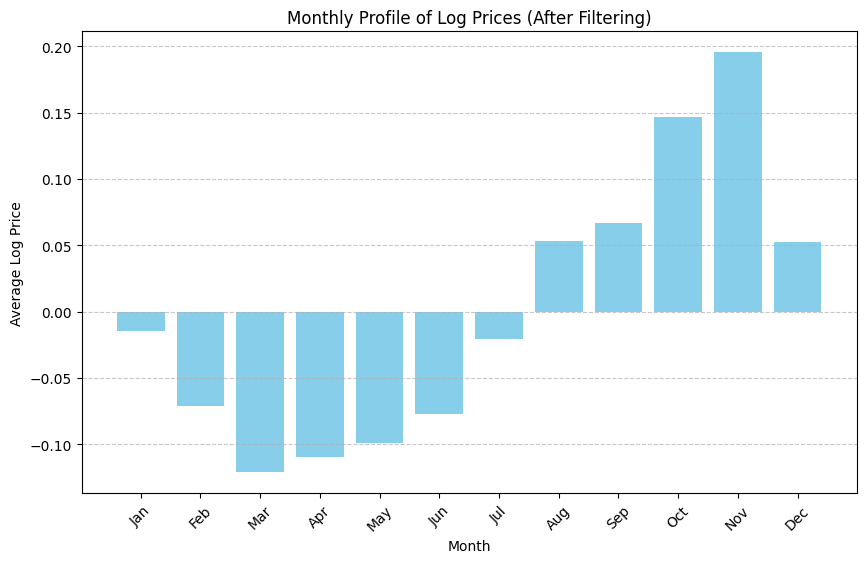

In [4]:

## CREATING A DATABASE WITH A DATE FOR EACH MEASURMENT

date_range = pd.date_range(end="2019-12-31", periods=len(price), freq='M')
df_price = pd.DataFrame({'price': price, 'date': date_range})

df_price = df_price.rename(columns={'price': 'Value',"date":"Date"})
df_price.set_index('Date', inplace=True)

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming ts_df is your DataFrame with 'Date' as index and 'Value' as prices

ts_df = df_price ###### EXLCUDING 1st YEAR DUE TO SOME PROBLEMS. #########

# Step 1: Calculate log of prices
#ts_df['Log_Price'] = (ts_df['Value'])

# Step 2: Create monthly dummies
ts_df['Month'] = ts_df.index.month
dummies = pd.get_dummies(ts_df['Month'], prefix='Month', drop_first=False)
ts_df = pd.concat([ts_df, dummies], axis=1)


# Step 4: Prepare data and run regression
X = ts_df.filter(like='Month_')
y = ts_df['Value']
model = sm.OLS(y, X).fit()
print(model.summary())

# Step 5: Plot the monthly profile
monthly_coeffs = model.params.reindex([f'Month_{i}' for i in range(1, 13)])
monthly_coeffs -= np.mean(monthly_coeffs)
std_mean_coeff = np.std(monthly_coeffs)
print(std_mean_coeff)

mean_coeffs1 = monthly_coeffs
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
plt.bar(months, monthly_coeffs, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Log Price')
plt.title('Monthly Profile of Log Prices (After Filtering)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [5]:
df= np.load("/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/Time series/time_series_stats29_4_20.npy",allow_pickle=True)
df=df.item()

In [6]:
prices=df["sac_model_1500000_pen1000.0_pen_thresh0.0_rep4.zip"]["price"]


Month_1     0.130848
Month_2     0.078309
Month_3     0.103098
Month_4     0.106187
Month_5     0.048132
Month_6     0.031831
Month_7     0.049444
Month_8     0.043743
Month_9     0.042381
Month_10    0.030820
Month_11    0.053520
Month_12    0.053020
dtype: float64


/tmp/ipykernel_7057/1569743035.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(end="2000-12-31", periods=len(price), freq='M')
/tmp/ipykernel_7057/1569743035.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(end="2000-12-31", periods=len(price), freq='M')
/tmp/ipykernel_7057/1569743035.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(end="2000-12-31", periods=len(price), freq='M')
/tmp/ipykernel_7057/1569743035.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(end="2000-12-31", periods=len(price), freq='M')
/tmp/ipykernel_7057/1569743035.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_

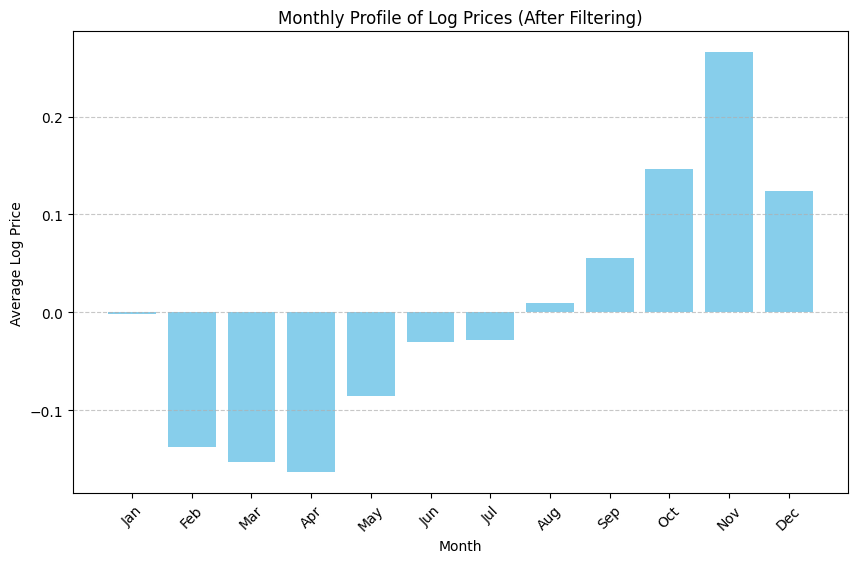

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming ts_df is your DataFrame with 'Date' as index and 'Value' as prices

data={}
for k in range(len(prices)):
    data[k]=[]
    price=prices[k]
    price=price[:]
    price = np.log(price)
    price=pd.Series(prices[k]).diff().dropna()
    date_range = pd.date_range(end="2000-12-31", periods=len(price), freq='M')
    df_price = pd.DataFrame({'price': price, 'date': date_range})

    df_price = df_price.rename(columns={'price': 'Log_Price',"date":"Date"})
    df_price.set_index('Date', inplace=True)
    ts_df1 = df_price ###### EXLCUDING 1st YEAR DUE TO SOME PROBLEMS. #########
    sim_data = df_price


    # Step 2: Create monthly dummies
    ts_df1['Month'] = ts_df1.index.month
    dummies = pd.get_dummies(ts_df1['Month'], prefix='Month', drop_first=False)
    ts_df1 = pd.concat([ts_df1, dummies], axis=1)


    # Step 4: Prepare data and run regression
    X = ts_df1.filter(like='Month_')
    y = ts_df1['Log_Price']
    model = sm.OLS(y, X).fit()
    #print(model.summary())

    # Step 5: Plot the monthly profile
    monthly_coeffs = model.params.reindex([f'Month_{i}' for i in range(1, 13)])
    monthly_coeffs -= np.mean(monthly_coeffs)
    data[k].append(monthly_coeffs)


    # Convert the list of Series in each dict entry to a DataFrame
df_data = pd.DataFrame([v[0].values for v in data.values()], columns=data[0][0].index)
df_data


# Calcola la media per ciascun mese (colonna)
mean_per_month = df_data.mean(axis=0)
std_per_month = df_data.std(axis=0)
print(std_per_month)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#
plt.figure(figsize=(10, 6))
plt.bar(months, mean_per_month, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Log Price')
plt.title('Monthly Profile of Log Prices (After Filtering)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [52]:
#!pip install openpyxl
#!pip install statsmodels
import pandas as pd

# Step 1: Read metadata (first 6 rows)
metadata_df = pd.read_excel('/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/ttf_data.xlsx', nrows=6, header=None)
metadata = dict(zip(metadata_df[0], metadata_df[1]))

# Step 2: Read time series data (skip first 6 rows)
ts_df = pd.read_excel('/home/tizianobacaloni/tiziano_data/RL4GasStorage/gas_storage_model/ttf_data.xlsx', skiprows=6, header=None)
ts_df.columns = ['Date', 'Value']  # Rename columns
#ts_df = ts_df.iloc[:-48,:]
ts_df['Date'] = pd.to_datetime(ts_df['Date'], format='%m/%d/%Y')  # Convert to datetime
ts_df.set_index('Date', inplace=True)  # Set Date as index

# Optional: Convert to a pandas Series (if you only need the values)
ts = ts_df['Value']

# Output (for verification)
#print("Metadata:", metadata)
#print("\nTime Series DataFrame:")
print(ts_df.tail())
#print("\nTime Series (as Series):")
#print(ts.head())
#print(len(ts_df))

             Value
Date              
2025-01-31  53.237
2025-02-28  44.320
2025-03-31  40.667
2025-04-30  32.317
2025-05-30  34.228


                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.4678
Date:                Mon, 14 Jul 2025   Prob (F-statistic):              0.921
Time:                        09:06:33   Log-Likelihood:                -173.79
No. Observations:                 183   AIC:                             371.6
Df Residuals:                     171   BIC:                             410.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Month_1        3.2205      0.167     19.277      0.0

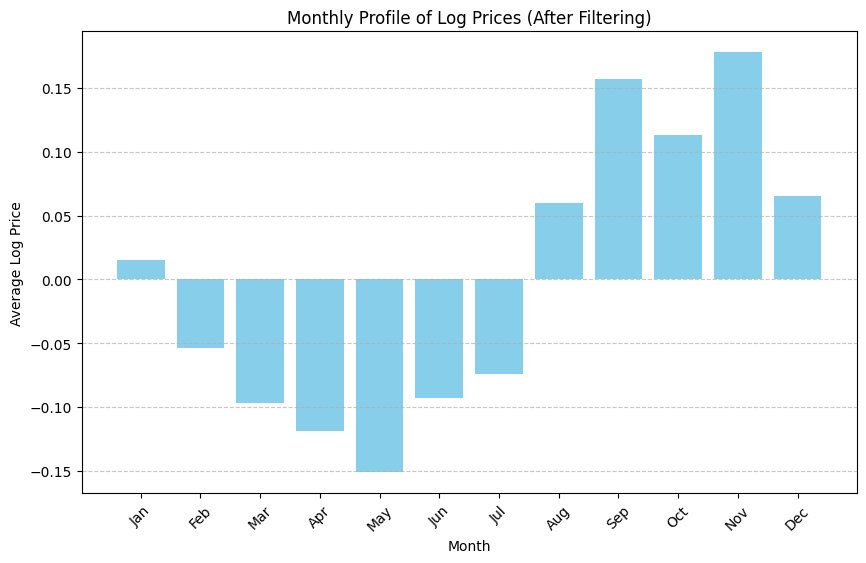

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming ts_df is your DataFrame with 'Date' as index and 'Value' as prices

# Step 1: Calculate log of prices
ts_df['Log_Price'] = np.log(ts_df['Value'])
real_data = ts_df

# Step 2: Create monthly dummies
ts_df['Month'] = ts_df.index.month
dummies = pd.get_dummies(ts_df['Month'], prefix='Month', drop_first=False)
ts_df = pd.concat([ts_df, dummies], axis=1)


# Step 4: Prepare data and run regression
X = ts_df.filter(like='Month_')
y = ts_df['Log_Price']
model = sm.OLS(y, X).fit()
print(model.summary())

# Step 5: Plot the monthly profile
monthly_coeffs = model.params.reindex([f'Month_{i}' for i in range(1, 13)])
monthly_coeffs -= np.mean(monthly_coeffs)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
plt.bar(months, monthly_coeffs, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Log Price')
plt.title('Monthly Profile of Log Prices (After Filtering)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
df_data

,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0.049034,-0.045127,0.214338,-0.512651,-0.169029,0.010161,-0.080261,-0.014833,0.072820,0.151834,0.246750,0.076963
1,0.041424,-0.177506,-0.167233,-0.129808,-0.054243,-0.027052,-0.010636,0.027552,0.046820,0.100961,0.221319,0.128401
2,-0.077063,-0.142672,-0.180490,-0.282067,-0.124670,-0.019628,0.040369,0.059261,0.141002,0.159357,0.245112,0.181489
3,-0.183950,-0.204780,-0.146848,-0.120443,-0.067036,-0.063814,-0.018578,0.066300,0.126800,0.196681,0.296526,0.119141
4,0.396252,-0.244801,-0.265540,-0.280269,-0.209363,-0.053317,-0.063532,-0.000334,0.005004,0.169384,0.357157,0.189358
5,-0.041453,-0.128306,-0.165172,-0.128604,-0.074140,-0.037678,-0.034599,0.012736,0.038053,0.127693,0.246623,0.184846
6,0.159603,-0.292827,-0.144638,-0.099946,-0.039314,-0.049710,-0.182355,-0.047883,0.038463,0.163888,0.341088,0.153631
7,-0.059063,-0.043416,-0.244253,-0.269088,-0.087554,-0.029605,-0.015817,0.064495,0.090191,0.139206,0.329925,0.124979
8,-0.058439,-0.045506,-0.277804,-0.128720,-0.083018,-0.063036,-0.008177,0.035297,0.109431,0.194831,0.216132,0.109009
9,-0.210825,-0.231214,-0.117583,-0.056177,-0.103590,-0.043470,-0.008562,0.064144,0.097619,0.217491,0.206720,0.185448


In [11]:
#Valori sui dati simulati
mean_per_month

Month_1    -0.001804
Month_2    -0.137881
Month_3    -0.153121
Month_4    -0.163363
Month_5    -0.085599
Month_6    -0.030380
Month_7    -0.028318
Month_8     0.009778
Month_9     0.055348
Month_10    0.146339
Month_11    0.265439
Month_12    0.123562
dtype: float64

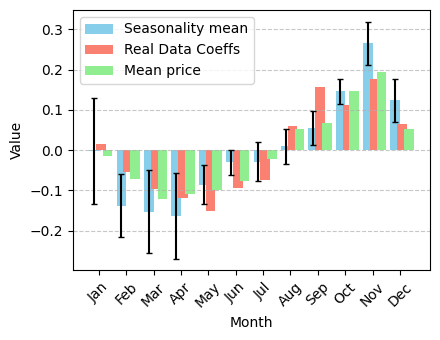

In [16]:

plt.figure(figsize=(4.5, 3.5))

# Bar plot for mean_per_month with std error bars
plt.bar(months, mean_per_month, yerr=std_per_month, width=0.35, label='Seasonality mean', color='skyblue', capsize=2)

# Bar plot for monthly_coeffs (real data), shifted for visibility
plt.bar([i + 0.25 for i in range(len(months))], monthly_coeffs, width=0.35, label='Real Data Coeffs', color='salmon')

plt.bar([i + 0.50 for i in range(len(months))],mean_coeffs1,  width=0.35, label='Mean price ', color='lightgreen',capsize=2)


plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks([i + 0.175 for i in range(len(months))], months,rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("season",dpi=500)
plt.show()

### Analysis on log 1st difference distribution


In [13]:
sim_data = np.log(pd.DataFrame(prices))
sim_data = sim_data.diff(axis=1)
sim_data = np.array(sim_data).flatten()
sim_data = pd.Series(sim_data)



real_data=ts_df["Log_Price"].diff()

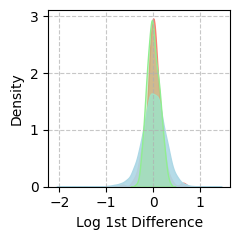

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(2.5, 2.5))

sns.kdeplot(real_data.dropna(), label='Real ', color='salmon', fill=True, alpha=0.8)
sns.kdeplot(sim_data.dropna(), label='Simulated ', color='lightblue', fill=True, alpha=0.9)
sns.kdeplot(mean_price.dropna(),label = "Mean simulated", color = "lightgreen",fill=True,alpha=0.4)

plt.xlabel('Log 1st Difference')
plt.ylabel('Density')
#plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("isto",dpi=300)
plt.show()


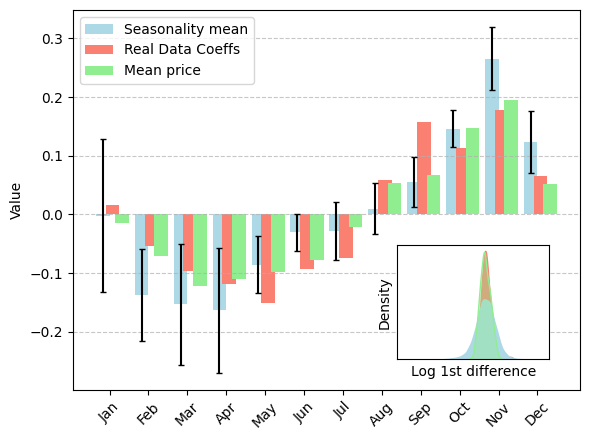

In [48]:
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4.5))
ax = plt.gca()

# Bar plot for mean_per_month with std error bars
ax.bar(months, mean_per_month, yerr=std_per_month, width=0.35, label='Seasonality mean', color='lightblue', capsize=2)
# Bar plot for monthly_coeffs (real data), shifted for visibility
ax.bar([i + 0.25 for i in range(len(months))], monthly_coeffs, width=0.35, label='Real Data Coeffs', color='salmon')
ax.bar([i + 0.50 for i in range(len(months))], mean_coeffs1, width=0.35, label='Mean price', color='lightgreen', capsize=2)

ax.set_ylabel('Value')
ax.set_xticks([i + 0.175 for i in range(len(months))])
ax.set_xticklabels(months, rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Inset axes for histogram
ax_inset = inset_axes(ax, width="30%", height="30%", loc='lower right', borderpad=2.2)
ax_inset.set_axisbelow(True)              # mette la griglia "sotto" le linee
ax_inset.grid(True, linestyle='--', alpha=0.7)


sns.kdeplot(real_data.dropna(), label='Real', color='salmon', fill=True, alpha=1, ax=ax_inset)
sns.kdeplot(sim_data.dropna(), label='Simulated', color='lightblue', fill=True, alpha=1, ax=ax_inset)
sns.kdeplot(mean_price.dropna(), label="Mean simulated", color="lightgreen", fill=True, alpha=0.4, ax=ax_inset)

ax_inset.set_xlabel('Log 1st difference')
ax_inset.set_ylabel('Density')

ax_inset.set_xticks([])
ax_inset.set_yticks([])
plt.savefig("season_with_inset", dpi=500)
plt.show()

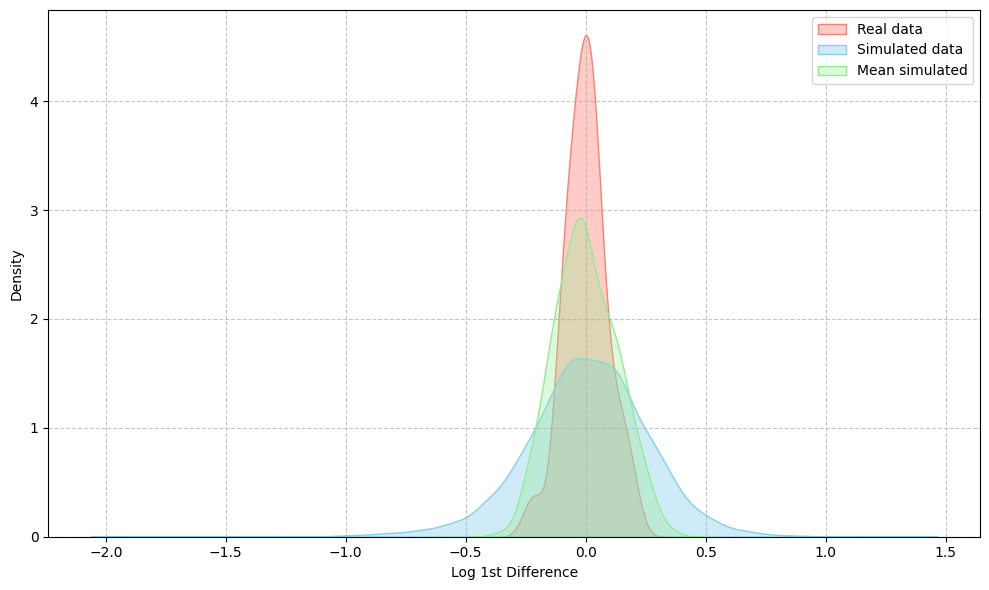

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.kdeplot(real_data[:-72].dropna(), label='Real data', color='salmon', fill=True, alpha=0.4)
sns.kdeplot(sim_data.dropna(), label='Simulated data', color='skyblue', fill=True, alpha=0.4)
sns.kdeplot(mean_price.dropna(),label = "Mean simulated", color = "lightgreen",fill=True,alpha=0.3)


plt.xlabel('Log 1st Difference')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
